<h1><center> DS 300 - PE5: Convolutional Neural Networks</center></h1>

## Setup:

If you are running on your own computer, make sure you've installed Keras.

```
conda install keras
conda install --upgrade keras
```

## Question 1:

#### Import all the basic libraries.

In [1]:
# Importing the libraries





#### Import mnist from `tensorflow.keras.datasets`

In [2]:
from tensorflow.keras.datasets import mnist

#### Use `load_data()` method to load the mnist data and split the data into training and testing sets. Read the docstring of `load_data()` to see the output format the `load_data()` method.

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
X_train.dtype

dtype('uint8')

In [9]:
y_train.dtype

dtype('uint8')

## Question 2:

#### We need to explicitly convert the data into the format Keras / TensorFlow expects. Since we're treating the data as 2D images of 28x28 pixels instead of a flattened stream of 784 pixels, we need to shape it accordingly. Depending on the data format Keras is set up for, this may be 1x28x28 or 28x28x1 (the "1" indicates a single color channel, as this is just grayscale. If we were dealing with color images, it would be 3 instead of 1 since we'd have red, green, and blue color channels)

In [11]:
from tensorflow.keras import backend as K

#### First, reshape the training and testing set and decide the input_shape.

In [12]:
# If backend Tensorflow detects the image_data_format as 'channels_first'
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

In [13]:
X_train.shape

(60000, 28, 28, 1)

In [14]:
X_test.shape

(10000, 28, 28, 1)

#### Then we divide the image data by 255 in order to normalize it into 0-1 range, after converting it into floating point values. Use the `astype('float32')` method to convert.

In [15]:
# Convert to float
X_train = 
X_test = 

# Normalize
X_train =
X_test =

## Question 3:

#### Now we'll convert the 0-9 labels into "one-hot" format. We will use a new method `to_categorical` from Keras.

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_train = 

y_test = 


In [18]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## Question 4:
#### Let's take a peek at one of the training images just to make sure it looks okay.

In [19]:
def plot_digit(index = 0):
    '''
    @ Argument: index - the index to an image in the training set
    @ Return: None
    '''
    # Print the one-hot array of this image's label 
    print(         )  
    
    # Obtain the label converted back to an integer number
    label =  
    
    # Reshape the flattened image (768 values) to a 28x28 image
    image =  
    
    plt.figure(figsize = (6, 6))
    plt.title('Sample: %d  Label: %d' % (index, label))
    
    # Use `imshow` to plot the digit out
    # Ensure to plot with a grayscale color map. 
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


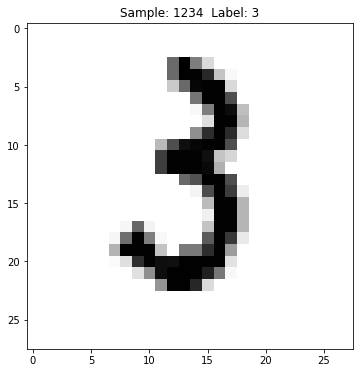

In [20]:
# Try one sample with index 1234
plot_digit(1234)

## Question 5:

#### Now create an sequential CNN model that generate the following model information.

Now for the meat of the problem. Setting up a convolutional neural network involves more layers. Not all of these are strictly necessary; you could run without pooling and dropout, but those extra steps help avoid overfitting and help things run faster.

We'll start with a 2D convolution of the image - it's set up to take 32 "feature detectors" or "filters", of each image, each feature detector being 3x3 in size.

We then run a second convolution on top of that with 64 3x3 windows - this topology is just what comes recommended within Keras's own examples. Again you want to re-use previous research whenever possible while tuning CNN's, as it is hard to do.

Next we apply a MaxPooling2D layer that takes the maximum of each 2x2 result to distill the results down into something more manageable.

A dropout filter is then applied to prevent overfitting. Use drop out rate as 25%.

Next we flatten the 2D layer we have at this stage into a 1D layer. So at this point we can just pretend we have a traditional multi-layer perceptron and feed that into a fully connected layer of 128 units.

We then apply dropout again to further prevent overfitting. This time use drop out rate 50%. 

And finally, we feed that into our final 10 units where softmax is applied to choose our category of 0-9.

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
model = keras.Sequential()








model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

2022-10-17 23:42:43.960588: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Question 6:

#### Setting up the optimizer and loss function and then compile the model. We will use the 'adam' optimizer here. Other choices include Adagrad, SGD, RMSprop, Adadelta, Adamax, and Nadam. You might want to try RMSProp if you have time. See https://keras.io/optimizers/

#### Training the model. Here we'll execute 2 epochs with a batch size of 128. Try larger epochs if you have time. Keras is slow, and if we're not running on top of a GPU-accelerated Tensorflow this can take a fair amount of time (that's why I've limited it to just 2 epochs). Use the testing set for validation.

In [24]:
history = 



Epoch 1/2
469/469 [==============================] - 73s 155ms/step - loss: 0.2360 - accuracy: 0.9286 - val_loss: 0.0520 - val_accuracy: 0.9835
Epoch 2/2
469/469 [==============================] - 67s 142ms/step - loss: 0.0819 - accuracy: 0.9750 - val_loss: 0.0348 - val_accuracy: 0.9874


## Question 7:

#### Examine the classification score with the `evaluate` function from keras.

In [25]:
score = 


print('Test loss:',     )
print('Test accuracy:',       )

313/313 [==============================] - 4s 12ms/step - loss: 0.0348 - accuracy: 0.9874
Test loss: 0.034822624176740646
Test accuracy: 0.9873999953269958


## Question 8:

#### Our model is working fine. Now we will visualize training and validation accuracies.

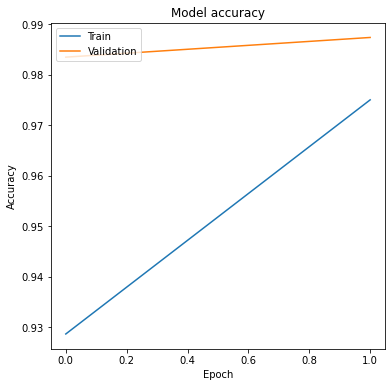

In [26]:
plt.figure(figsize=(6, 6))
plt.title('Model accuracy')



plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Question 9:

#### Let's visualize the ones that the model got wrong from the first 1000 images. 

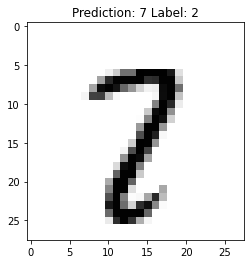

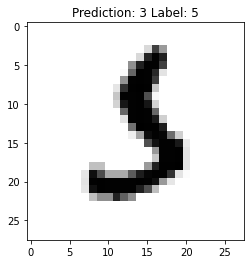

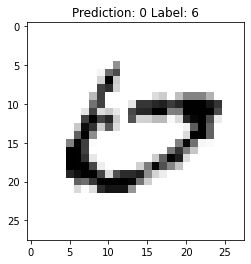

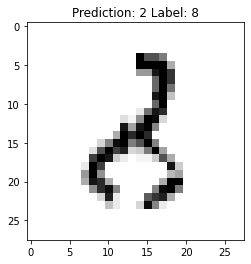

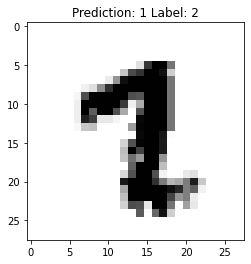

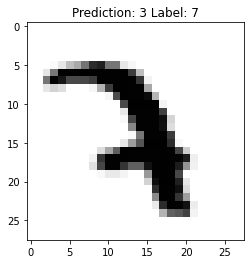

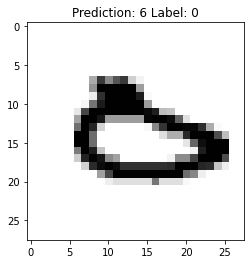

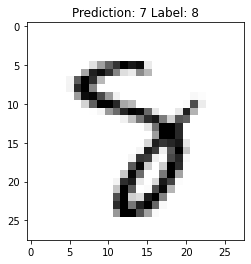

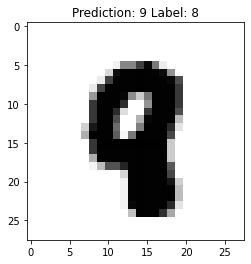

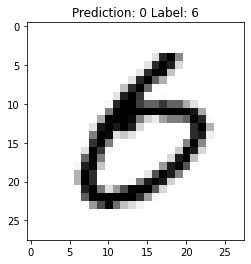

In [27]:
y_pred = model.predict(X_test)

for i, pred in enumerate(y_pred[:1000]):
    pred_label =  
    
    true_label = 
    
    if (pred_label != true_label):
        plt.title('Prediction: %d Label: %d' % (pred_label, true_label))
        plt.imshow(                  , cmap=plt.get_cmap('gray_r'))
        plt.show()

## Question 10:

#### If you have time, try to think how to solve the same problem with ANN. Hint: your input data size may be different as ANN will have to take in flattened data. 


## Great job!